C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7600 - loss: 0.6627 - val_accuracy: 0.8510 - val_loss: 0.4102
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8827 - loss: 0.3286 - val_accuracy: 0.8851 - val_loss: 0.3083
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9010 - loss: 0.2708 - val_accuracy: 0.8949 - val_loss: 0.2812
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9140 - loss: 0.2393 - val_accuracy: 0.9003 - val_loss: 0.2678
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9245 - loss: 0.2010 - val_accuracy: 0.9106 - val_loss: 0.2489
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9347 - loss: 0.1789 - val_accuracy: 0.9124 - val_loss: 0.2435
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9417 - loss: 0.1537 - val_accuracy: 0.9084 - val_loss: 0.2633
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9489 - loss: 0

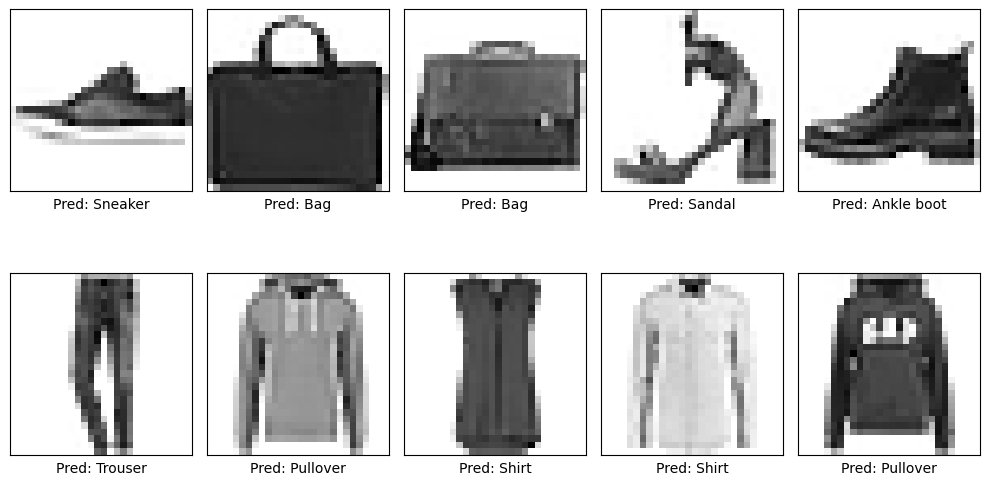

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv(r"C:\Users\lenovo\Downloads\archive (2)\fashion-mnist_train.csv")

# Split features and labels
y = df['label'].values
X = df.drop('label', axis=1).values

# Normalize and reshape the input
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

# Split into train and test sets manually (since CSV only has train data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Class names (as in original Fashion MNIST)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Predict on test images
predictions = model.predict(X_test)

# Plot some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predictions[i].argmax()]}")
plt.tight_layout()
plt.show()


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9655 - loss: 0.0937 - val_accuracy: 0.9125 - val_loss: 0.3115
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9699 - loss: 0.0821 - val_accuracy: 0.9124 - val_loss: 0.3052
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9758 - loss: 0.0655 - val_accuracy: 0.9086 - val_loss: 0.3352
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9777 - loss: 0.0590 - val_accuracy: 0.9099 - val_loss: 0.3783
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9800 - loss: 0.0542 - val_accuracy: 0.9113 - val_loss: 0.3837
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9821 - loss: 0.0479 - val_accuracy: 0.9061 - val_loss: 0.4143
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9835 - loss: 0.0449 - val_accuracy: 0.9043 - val_loss: 0.4652
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9851 - loss: 

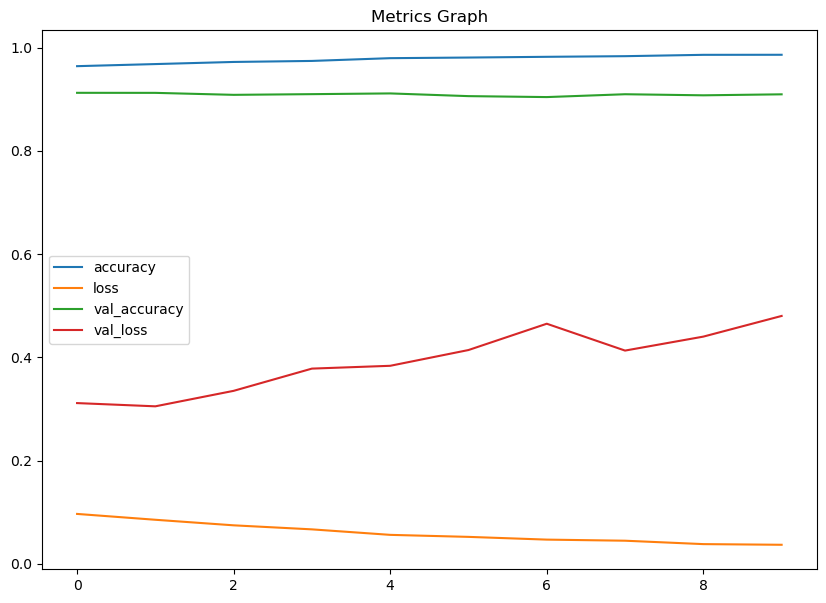

In [2]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))    
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()